## Import packages

$\Downarrow$ This is an ***Essential part***, please run the code block below $\Downarrow$

In [1]:
import torch
import numpy as np

from utils.City import City
from utils.Road_Network import RoadNetwork3D
from utils.Visulisation import Visulisation
from pointer_network.PointerNet import PointerNet

---

# Integration and Network

### Input data path

The below paths should be ***specified by users***!

`road_path` is the 2D road data JSON file path.

`ele_path` is the elevation data file path.

$\Downarrow$ This is an ***Essential part***, please run the code block below $\Downarrow$

In [2]:
road_path = 'data/accra_road.json' # The path of 2D road data
ele_path = 'data/elevation/n05_w001_1arc_v3.tif' # The path of elevation data

### Integrate data and create network

`accra_road` is the instance of the class `RoadNetwork3D`

`accra_road.integrate()` command will integrate 2D road data and elevation data into 3D road data that will be stored in the instance.

`accra_road.create_network()` command will create a network graph for the 3D road data. The graph will be stored in the instance too.

$\Downarrow$ This is an ***Essential part***, please run the code block below $\Downarrow$

In [3]:
accra_road = RoadNetwork3D(road_path, ele_path)
accra_road.integrate() # Integrate 2D road data + elevation data = 3D road data
accra_road.create_network() # Create Network

Creating network: 100%|████████████| 142611/142611 [00:01<00:00, 87914.08item/s]


After these simple steps, a route optimization system for Accra(or user specification) is built. 

You can use the code below to make route planning.

### Create the locations

Create any locations in Accra you want. 

Each instance of `City` class stores information of one location. 

- The first parameter is latitude
- The second parameter is longitude
- The third parameter is elevation (optional)
- The last parameter is whether the coordinate format is (lon, lat). If `True`, then the first parameter should be longitude, and the second parameter should be latitude. Users can also use UTM coordinate system. Northing corresponds to latitude, easting corresponds to longitude.

In [4]:
# The four locations below are just examples, users can change them or add locations casually.
kotoka_airport = City(5.605522862563998, -0.17187326099346129, None, lon_lat=False)
uni_ghana = City(5.650618146052781, -0.18703194651322047, None, lon_lat=False)
accra_zoo = City(5.625370802046447, -0.20300362767245603, None, lon_lat=False)
national_museum = City(5.560739525028722, -0.20650512945516059, None, lon_lat=False)

### Route planning

Find the shortest path(most time-saving path) for any pair of locations.

Use `accra_road.get_shortest_path(city1, city2, weight)` to get the route planning which is a list of points on the target path.

Use `visual = Visulisation(accra_road)` to create an instance of `Visualisation` class for `accra_road`

Use `visual.show_route(shortest_path)` to draw the shortest path on the map. You can specify the parameter `ele_back` for different figure style.

Use `accra_road.get_shortest_path_length(city1, city2, weight)` to get the length(travel time) of the route planning.


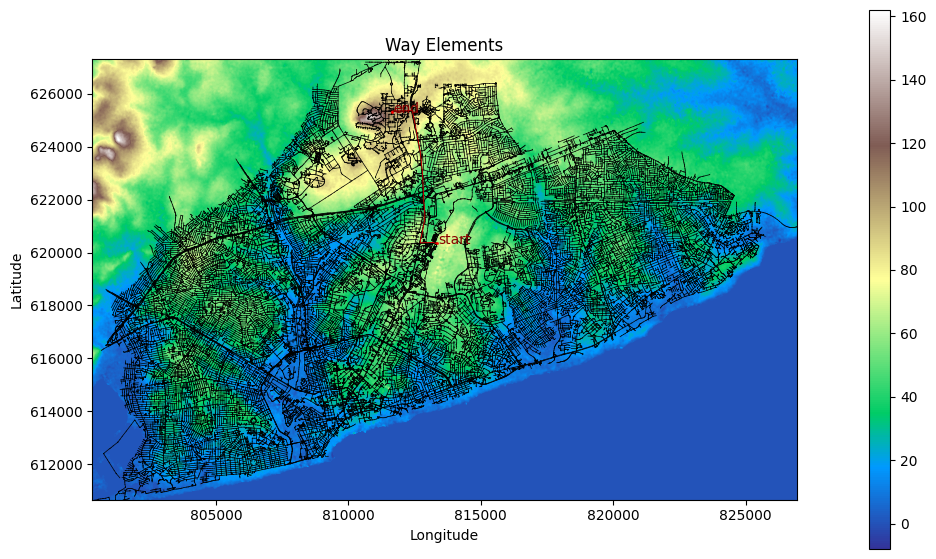

Time: 
--------
771.3698091578315
859.8237954743684
817.3247367355353
730.8856689124311
1133.4223047114901
Distance: 
--------
6548.781598168547
6939.570020442735
7510.169530070855
5402.730742912844
9966.609126675477


In [5]:
shortest_path = accra_road.get_shortest_path(kotoka_airport, uni_ghana, weight='distance')

visual = Visulisation(accra_road)
#visual.draw_2Droad()
visual.show_route(shortest_path, ele_back=True)

print("Time: ")
print("--------")
print(accra_road.get_shortest_path_length(kotoka_airport, uni_ghana, weight='time')) #13min
print(accra_road.get_shortest_path_length(kotoka_airport, accra_zoo, weight='time')) #15min
print(accra_road.get_shortest_path_length(kotoka_airport, national_museum, weight='time')) #13min
print(accra_road.get_shortest_path_length(accra_zoo, uni_ghana, weight='time')) #22min
print(accra_road.get_shortest_path_length(accra_zoo, national_museum, weight='time')) #21min
print("Distance: ")
print("--------")
print(accra_road.get_shortest_path_length(kotoka_airport, uni_ghana, weight='distance')) #6.5km
print(accra_road.get_shortest_path_length(kotoka_airport, accra_zoo, weight='distance')) #7.7km
print(accra_road.get_shortest_path_length(kotoka_airport, national_museum, weight='distance')) #7.4km
print(accra_road.get_shortest_path_length(accra_zoo, uni_ghana, weight='distance')) #6.8km
print(accra_road.get_shortest_path_length(accra_zoo, national_museum, weight='distance')) #9.7km

### Other functionality demo

In [6]:
accra_road.delete_road_type('primary') # delete road types which is not need to be integrated.
accra_road.add_road_type('primary') # Add road types need to be integrated.
accra_road.print_road_type() # Show all road types which will be integrated.


---------------------------------------------
The road types to be integrated are as follows:
['tertiary',
 'secondary_link',
 'service',
 'trunk_link',
 'primary',
 'primary_link',
 'secondary',
 'unclassified',
 'tertiary_link',
 'trunk',
 'residential']
-----------------------------------------------



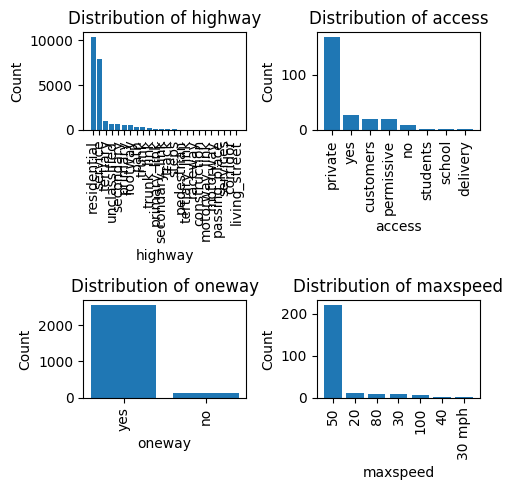

In [7]:
accra_road.show_tags() # Draw figures for tags.

In [9]:
accra_road.show_status() # Show the info of integration and network.

The data has been integrated into 3D road data.
The data has been used to created a network graph, you can use it to find shortest path.


In [10]:
road_3D = accra_road.get_3Droad() # Get the integrated 3D road JSON data.
accra_road.print_data() # Print the integrated 3D road JSON data.

{
    "type": "way",
    "id": 4178607,
    "bounds": {
        "minlat": 5.5717693,
        "minlon": -0.1111802,
        "maxlat": 5.5884697,
        "maxlon": -0.0778458
    },
    "nodes": [
        24231811,
        8109944392,
        24231814,
        8109944391,
        24231819,
        24231821,
        24231823,
        24231824,
        8109944390,
        24231826,
        8109901955,
        24231828,
        8109944389,
        24231829,
        24231831,
        24213691,
        24213692,
        24213694,
        24213696,
        24213697,
        24213699,
        8109901956,
        24213701,
        24213702,
        8567233008,
        24213704,
        24213706,
        24213708,
        8832748708,
        24213709,
        24213711,
        24213713,
        8567233007,
        8567233006,
        24213714,
        8109875981,
        8109875985,
        8567233005,
        24213716,
        6434229483,
        8109875984,
        24213718,
        8109875983,

In [11]:
point = accra_road.get_closest_point(City(5.5,0)) # Get the closest point in the network graph for a given coordinate.
print(point)

(8899935135, {'coordinate': (824423.7270128075, 619048.5248878469, 26)})


In [12]:
show_matrix = accra_road.weight_matrix([kotoka_airport, accra_zoo, uni_ghana, national_museum]) # Get the adjacent matrix for any given list of locations
print(show_matrix)

[[    0.          6939.57002044  6548.78159817  7510.16953007]
 [ 7009.26517308     0.          5402.73074291  9966.60912668]
 [ 6369.52236209  5385.4450974      0.         12410.48708551]
 [ 8138.86223815 10368.71496737 13362.75167137     0.        ]]


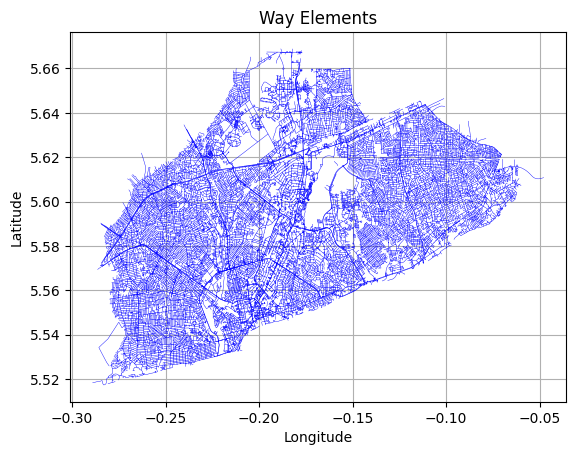

In [13]:
visual.draw_2Droad() # Draw the 2D map for given data.

---

# Using deep learning model to predict optimised route

### User's input
`model_path` is the trained model weight file path.

`matrix_path` is the adjacent matrix data file path used for test the model.

`index` is the number ***specified by user***, users can also use their own adjacent matrix.

$\Downarrow$ This is an ***Essential part***, please run the code block below $\Downarrow$

In [14]:
model_path = 'pointer_network/model_5cities_5000epochs_70000cleandata_scale_2048batch.pth'
matrix_path = 'pointer_network/weights_data_5city.npy'
index = 0

### Load model

$\Downarrow$ This is an ***Essential part***, please run the code block below $\Downarrow$

In [15]:
model = PointerNet(5,
                   256,
                512,
                2,
                0,
                True)

model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu'))['model'])

<All keys matched successfully>

### Load test data (User's can use their own data)

Load the test adjacent matrix data and scale it. 

The number for scaling is calculated from the training process.

Users can use their own matrix, but ***scaling is essential***.

In [16]:
adjacent_matrix = np.load(matrix_path)[70000:]
adjacent_matrix = adjacent_matrix/32395.9297608575 # Scale
label = np.load('pointer_network/labels_data_5city.npy')[70000:]

### Make prediction

Make prediction.

`p` is the predicted optimal route list.

In [18]:
_, p = model(torch.tensor(adjacent_matrix[index], dtype=torch.float32).unsqueeze(0))

print('Prediction:', p.squeeze(0).numpy())
print('True answer:', label[index])

Prediction: [0 4 3 1 2]
True answer: [0 4 3 1 2]
